In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

## Loading Data

In [2]:
df=pd.read_csv('/Users/dexter/Training/data.csv')

In [3]:
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [4]:
df.shape

(1159764, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

##### The unnamed column is useless. So, removing it.

In [6]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [7]:
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


## Exploratory Data Analysis

#### Top 5 popular artists

In [8]:
popular_artists=df.groupby('artist_name')['popularity'].mean().sort_values(ascending=False).head(5)
popular_artists

artist_name
NewJeans          85.333333
Elley Duhé        85.000000
Rema              80.666667
SunKissed Lola    80.000000
Fujii Kaze        80.000000
Name: popularity, dtype: float64

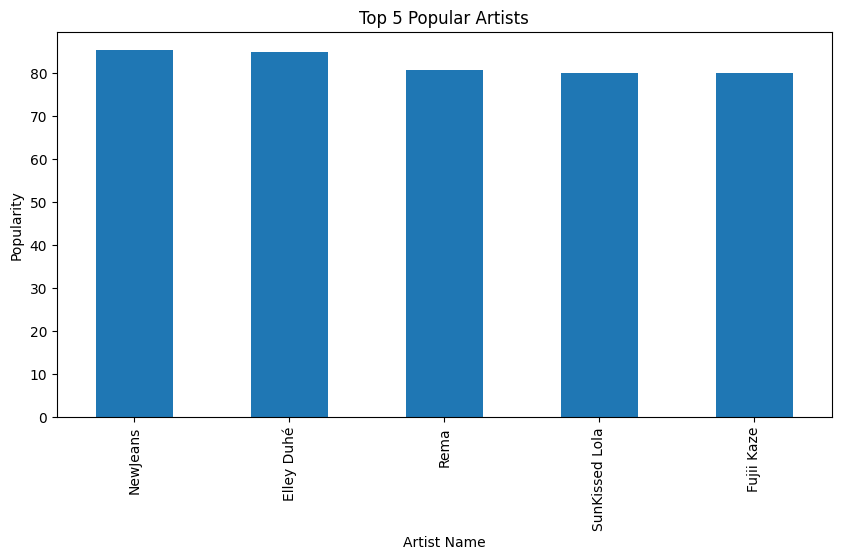

In [9]:
#visualizing the top 5 popular artists
popular_artists.plot(kind='bar',figsize=(10,5),xlabel='Artist Name',ylabel='Popularity',title='Top 5 Popular Artists')
plt.show()

#### Top 5 popular songs

In [10]:
popular_songs=df.groupby('track_name')['popularity'].mean().sort_values(ascending=False).head(5)
popular_songs

track_name
Shakira: Bzrp Music Sessions, Vol. 53    96.0
Die For You - Remix                      95.0
Calm Down (with Selena Gomez)            93.0
La Bachata                               93.0
Unholy (feat. Kim Petras)                92.0
Name: popularity, dtype: float64

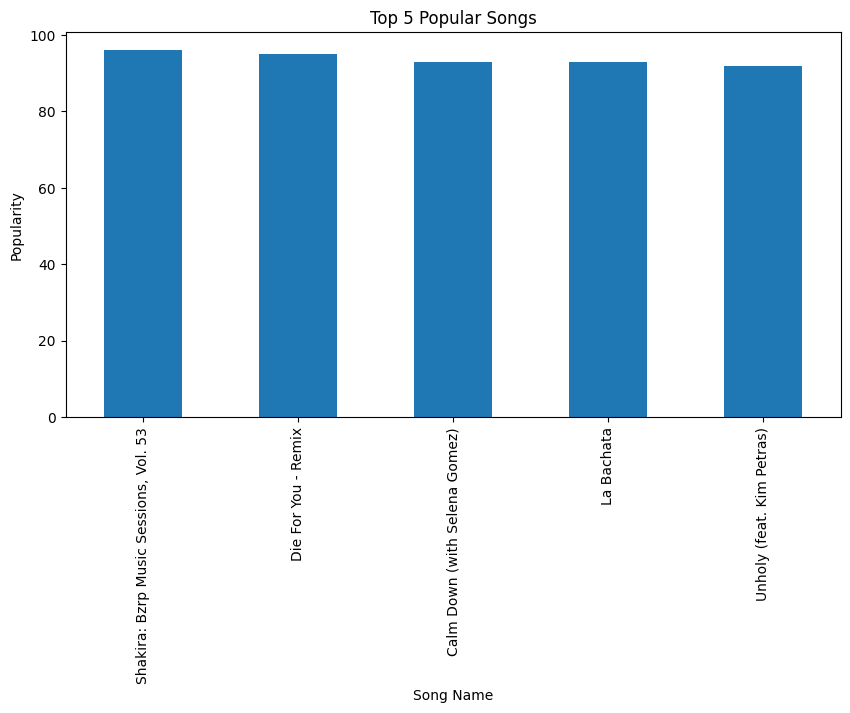

In [11]:
#visualizing the top 5 popular songs
popular_songs.plot(kind='bar',figsize=(10,5),xlabel='Song Name',ylabel='Popularity',title='Top 5 Popular Songs')
plt.show()

#### Top 5 trending genre

In [12]:
trending_genres=df.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(5)
trending_genres

genre
pop        55.685806
hip-hop    46.315736
rock       46.228985
dance      43.034337
metal      39.698860
Name: popularity, dtype: float64

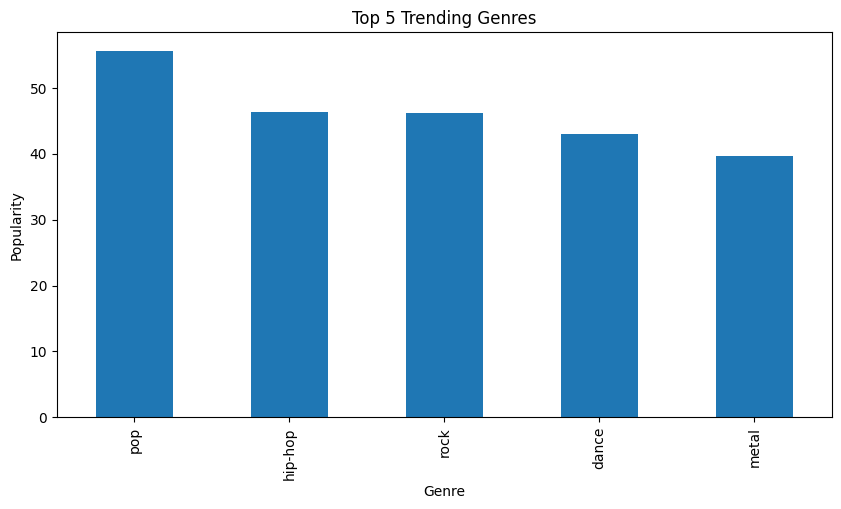

In [13]:
trending_genres.plot(kind='bar',figsize=(10,5),xlabel='Genre',ylabel='Popularity',title='Top 5 Trending Genres')
plt.show()

#### Top 5 longest songs of the top 5 popular artists

In [14]:
#top 5 longest songs in the dataset
longest_songs=df[['track_name','duration_ms']].sort_values(by='duration_ms',ascending=False)[:5]
longest_songs

,track_name,duration_ms
157171,Babbling Brook Close Up,6000495
103376,Rainstorm Ambience with Thunder Rolls and Peels,6000461
103634,Tranquil Rain Shower Ambience,6000328
103697,Beachside Rolling Wave Ambience,6000161
103592,Constant Small Waterfall Stream,6000061


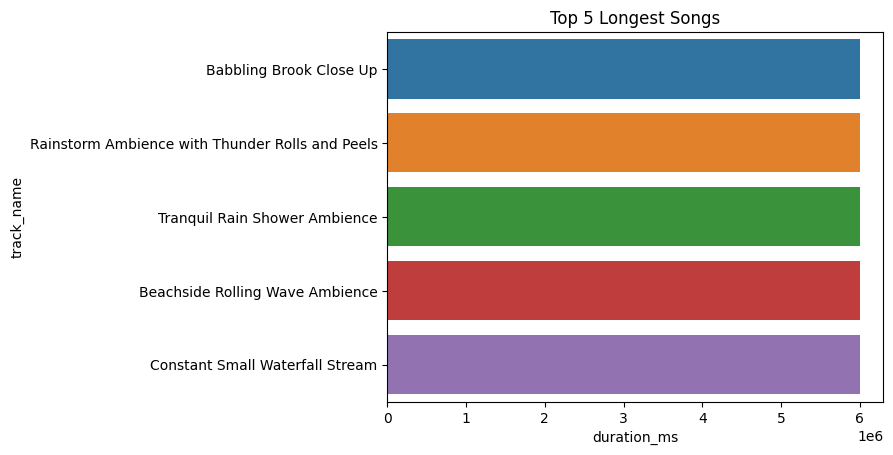

In [15]:
sns.barplot(x='duration_ms',y='track_name',data=longest_songs)
plt.title('Top 5 Longest Songs')
plt.show()

#### Top 5 most danceable songs

In [16]:
dance_songs=df[['track_name','danceability']].sort_values(by='danceability',ascending=False)[:5]
dance_songs

,track_name,danceability
1053853,Roll Like Dis / Cha-cha Slide Part 2,0.993
934348,Hospitality,0.992
1005329,Close the Door,0.992
123090,Royal Insanity,0.991
37083,Trombone,0.991


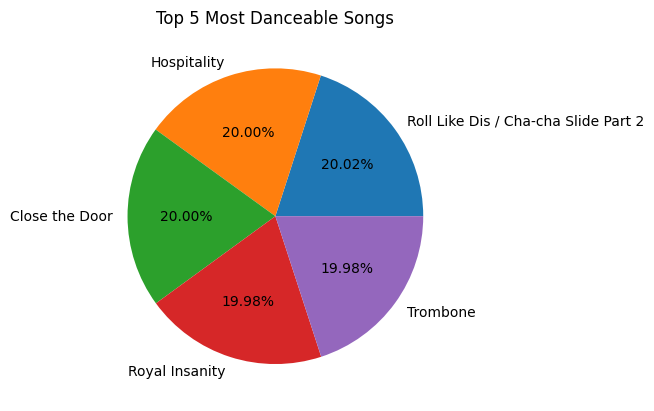

In [17]:
plt.pie(x="danceability", data=dance_songs, autopct='%1.2f%%', labels=dance_songs.track_name)
plt.title("Top 5 Most Danceable Songs")
plt.show()

In [18]:
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


## Pipeline

In [19]:
X=df.drop(['popularity'],axis=1)
y=df['popularity']

In [20]:
def LabelEncoding():
    cat_cols=['artist_name','track_name','track_id','genre']
    for col in cat_cols:
        X[col]=LabelEncoder().fit_transform(X[col])

LabelEncoding()

In [21]:
from sklearn.impute import SimpleImputer

num_processor = Pipeline(steps=[('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),('scaler',MinMaxScaler())])

In [22]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [23]:
from sklearn.compose import ColumnTransformer

preprocessor=ColumnTransformer([
                   ("numerical",num_processor,numerical_cols)])

preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 Index(['artist_name', 'track_name', 'track_id', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object'))])

In [24]:
final_pipeline = Pipeline([('preprocessing', preprocessor),('kbest',SelectKBest(chi2,k=5)), 
                           ('model', RandomForestRegressor(n_estimators=200))])
final_pipeline 

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['artist_name', 'track_name', 'track_id', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object'))])),
                ('kbest',
                 SelectKBest(k=5, score_func=<function chi2 at 0x17e9ec040>)),
                ('model', RandomForestRegressor(n_estimators=200))])

In [25]:
#Splitting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

final_pipeline.fit(X_train,y_train)

y_pred=final_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)

Root mean squared error:  9.767697459360607


In [26]:
trained_rf = final_pipeline.named_steps['model']
trained_rf.feature_importances_

array([0.17985541, 0.43940444, 0.12747263, 0.14649755, 0.10676997])

Text(0.5, 0, 'Random Forest Feature Importance')

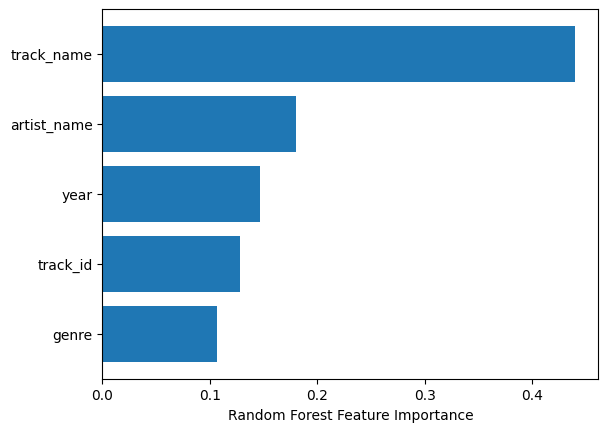

In [27]:
sorted_f=trained_rf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_f],trained_rf.feature_importances_[sorted_f])
plt.xlabel("Random Forest Feature Importance")

In [28]:
preprocessed_data=final_pipeline.named_steps['preprocessing'].transform(X_train)
preprocessed_df = pd.DataFrame(preprocessed_data,columns=X_train.columns)
preprocessed_df.head()

,artist_name,track_name,track_id,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.005315,0.612412,0.179006,0.521739,0.975309,0.656596,0.976,1.000000,0.872262,1.0,0.059011,0.113454,0.178,0.2330,0.8290,0.544194,0.038891,0.8
1,0.003507,0.406477,0.973714,0.739130,0.024691,0.627392,0.775,0.727273,0.795323,1.0,0.032853,0.037550,0.000,0.2780,0.8490,0.600845,0.029733,0.8
2,0.470027,0.496624,0.566292,0.521739,0.925926,0.555891,0.835,0.000000,0.837332,1.0,0.057878,0.019076,0.000,0.3360,0.6530,0.320079,0.032530,0.8
3,0.846566,0.311439,0.908219,0.739130,0.765432,0.713998,0.703,0.363636,0.803600,1.0,0.044799,0.017671,0.000,0.0630,0.5670,0.400167,0.035182,0.8
4,0.696780,0.885159,0.058735,0.260870,0.123457,0.211480,0.107,0.363636,0.527617,0.0,0.051699,0.987952,0.887,0.0598,0.0955,0.408511,0.017728,0.8


In [29]:
#Skewness and Kurtosis
print("Skewness: %f" % df['popularity'].skew())
print("Kurtosis: %f" % df['popularity'].kurt())

Skewness: 0.810030
Kurtosis: 0.065274


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


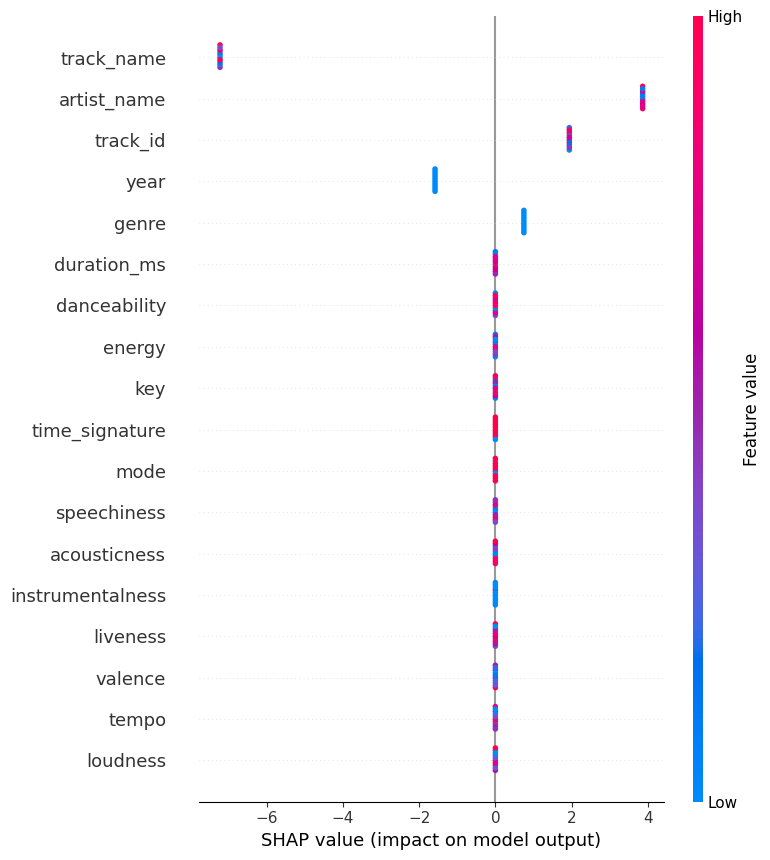

In [30]:
import shap

explainer = shap.Explainer(trained_rf)

# shap_values = explainer.shap_values(X_test)

subset = X.iloc[:10] 

shap_values = explainer(subset)

shap.summary_plot(shap_values, features=subset, feature_names=subset.columns)

## Retraining with important features and transformed data

In [32]:
df_new=pd.DataFrame(df.copy()[['artist_name','year','genre','popularity']])

In [33]:
df_new.head()

,artist_name,year,genre,popularity
0,Jason Mraz,2012,acoustic,68
1,Jason Mraz,2012,acoustic,50
2,Joshua Hyslop,2012,acoustic,57
3,Boyce Avenue,2012,acoustic,58
4,Andrew Belle,2012,acoustic,54


In [34]:
for cols in df_new.select_dtypes(include='object').columns:
    df_new[cols]=LabelEncoder().fit_transform(df_new[cols])

df_new.head()

,artist_name,year,genre,popularity
0,26235,2012,0,68
1,26235,2012,0,50
2,28122,2012,0,57
3,7629,2012,0,58
4,3014,2012,0,54


In [35]:
(df_new['popularity']!=0).sum()

1001373

In [36]:
from sklearn.utils import resample

df_majority = df_new[df_new['popularity'] == 0]

df_majority_undersampled = resample(df_majority, replace=False, n_samples=40000, random_state=42)

df_undersampled = pd.concat([df_majority_undersampled, df_new[df_new['popularity'] != 0]])

In [37]:
df_undersampled['popularity'].value_counts().head()

popularity
0    40000
1    39820
2    31247
8    30322
9    29249
Name: count, dtype: int64

In [38]:
df_undersampled

,artist_name,year,genre,popularity
958895,27621,2007,52,0
815142,2715,2004,36,0
483447,26839,2021,8,0
968975,58376,2007,73,0
960803,14603,2007,57,0
...,...,...,...,...
1159758,40236,2011,81,7
1159759,40236,2011,81,4
1159760,40236,2011,81,3
1159761,2723,2011,81,2


In [39]:
X2=df_undersampled.drop(['popularity'],axis=1)
y2=df_undersampled['popularity']

<Axes: >

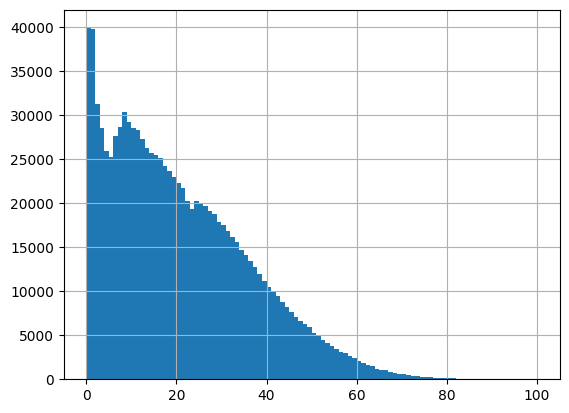

In [40]:
y2.hist(bins=100)

<Axes: >

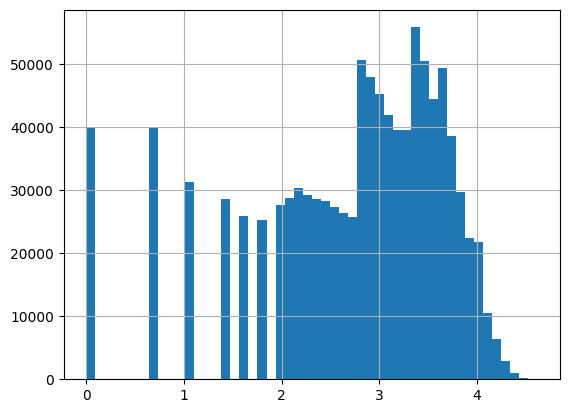

In [41]:
y_transformed = np.log(y2+1)
y_transformed.hist(bins=50)

In [42]:
from sklearn.impute import SimpleImputer

num_processor2 = Pipeline(steps=[('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),('scaler',MinMaxScaler())])

In [43]:
from sklearn.compose import ColumnTransformer

preprocessor2=ColumnTransformer(transformers=[("numerical",num_processor2,X2.columns)])

preprocessor2

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 Index(['artist_name', 'year', 'genre'], dtype='object'))])

In [44]:
final_pipeline2 = Pipeline([('preprocessing', preprocessor2), 
                           ('model', RandomForestRegressor(n_estimators=200))])
final_pipeline2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['artist_name', 'year', 'genre'], dtype='object'))])),
                ('model', RandomForestRegressor(n_estimators=200))])

In [45]:
#Splitting data
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y_transformed,test_size=0.2,random_state=101)

final_pipeline2.fit(X_train2,y_train2)

y_pred2=final_pipeline2.predict(X_test2)

mse2 = mean_squared_error(y_test2, y_pred2)
rmse2 = np.sqrt(mse2)
print("Root mean squared error: ", rmse2)

Root mean squared error:  0.4928299702549844
